# Trailor Axle Deflection/Strain Calculation

## Problem Statement
<br>
Trailor, most specifically 40ft tandem axle trailor, contains 4 major assemblies. Main rails, landing gear, axles, and suspension. At rest the trailer is supported at 3 ends: landing gear, front axle, and rear axle. It can be assumed that the weight distribution on the axles assemblies are directly transfered from the mainrails to the axles by the suspension assembly. Since, they are the only point of load transfer it could be assumed that there is a linear relationship between the load on axle, thus its deflection under load, and the load on the trailor. 

![img](https://raw.githubusercontent.com/yunghanjeong/Shear_Moment_Deflection/master/images/trailor_freebodydiagram.PNG)

However, static analysis of the load distribution is impossible since the degrees of freedom in static analysis for this case is -1. Therefore, this statically indeterminate body must be solved using superposition and piecewise by the double integration method. 


## Methods
1. Define governing equations using FBD above.
2. Solve the supports piecewise using double integration method using sympy
3. Feed the resulting forces on support as direct forces on the axle
4. Calculate axle deflection and strain 

In [10]:
import os
import src.smd_calc as smd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
trailer = smd.solve_chassis(OD = 5.0,wallthick  = 0.25)

In [26]:
support_load = trailer.solvetrailer(1000,40,1) #[16140.240, 11373.943, 12485.817, -143016.45]

Solving Statically Indeterminate Beam using Double Integration Piece Wise Fx 

REACTIONARY FORCES
A =  16140.240 lbs
B =  11373.943 lbs
C =  12485.817 lbs
Ma =  -143016.45 lbs*ft


In [30]:
axle = np.arange(20,29)
deflection_1 = [trailer.simp_im_def(num,w1=support_load[1]/2,w2=support_load[1]/2) for num in axle]
deflection_2 = [trailer.simp_im_def(num,w1=support_load[2]/2,w2=support_load[2]/2) for num in axle]

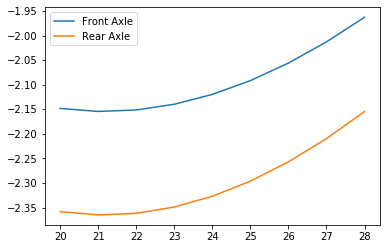

In [31]:
plt.plot(axle,deflection_1, label = "Front Axle")
plt.plot(axle,deflection_2, label = "Rear Axle")
plt.legend()